# Introduction

The notebook is intended to provide several EDA plots for different situations.

In [4]:
# Import Standard Libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import seaborn as sns

from pathlib import Path
from colorama import Style, Fore

In [5]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [6]:
# Define Colors
black = Style.BRIGHT + Fore.BLACK
magenta = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blue = Style.BRIGHT + Fore.BLUE
reset_colors = Style.RESET_ALL

In [25]:
# Define local data file paths
books_sold_train_file_path = Path(os.path.abspath('')).parents[0] / 'data' / 'books_sold_train.csv'

# Read data
books_sold_train = pd.read_csv(books_sold_train_file_path, parse_dates=['date'], index_col=0)

# General

# Numerical Variables

## Barplot per Category

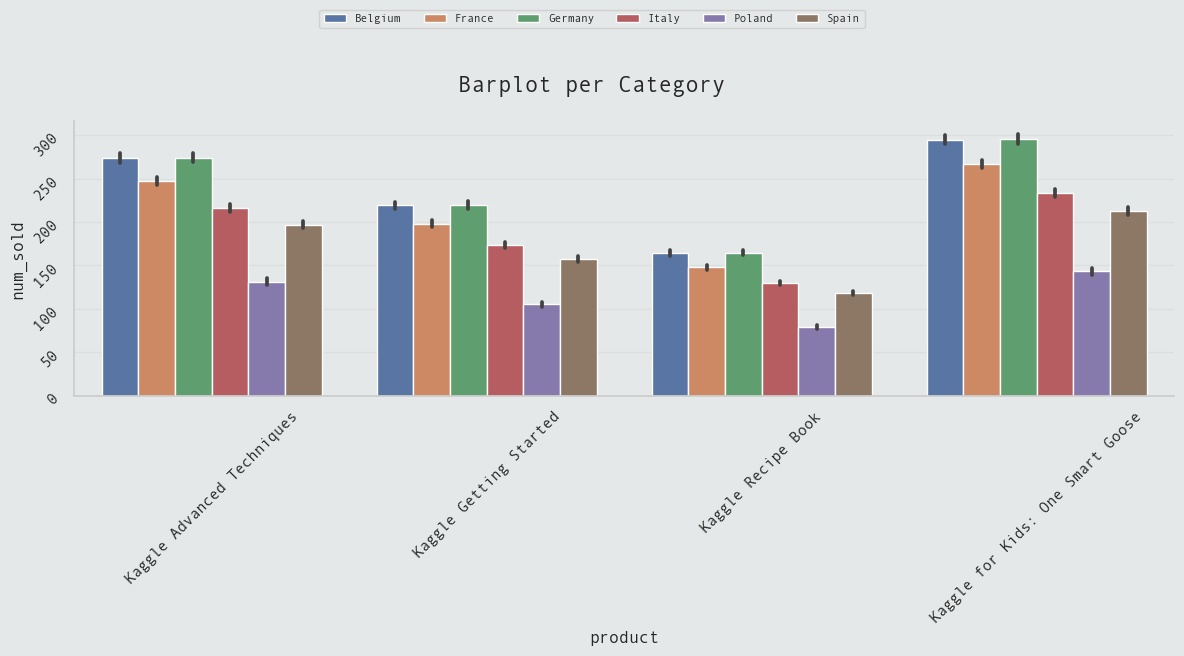

In [26]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot the barplot
sns.barplot(data=books_sold_train,
            x='product',
            y='num_sold',
            hue='country')
    
# Set subplot tick rotation
ax.tick_params(labelrotation=45)
    
# Retrieve legend information
handles = ax.get_legend_handles_labels()[0]
labels = ax.get_legend_handles_labels()[1]
ax.legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.10), 
              fontsize=8,
              ncol=len(handles))

# Set figure Title
figure.suptitle('Barplot per Category',
                fontweight='bold',
                fontsize=16)

plt.tight_layout()

## Lineplot per Category over Time

AttributeError: Can only use .dt accessor with datetimelike values

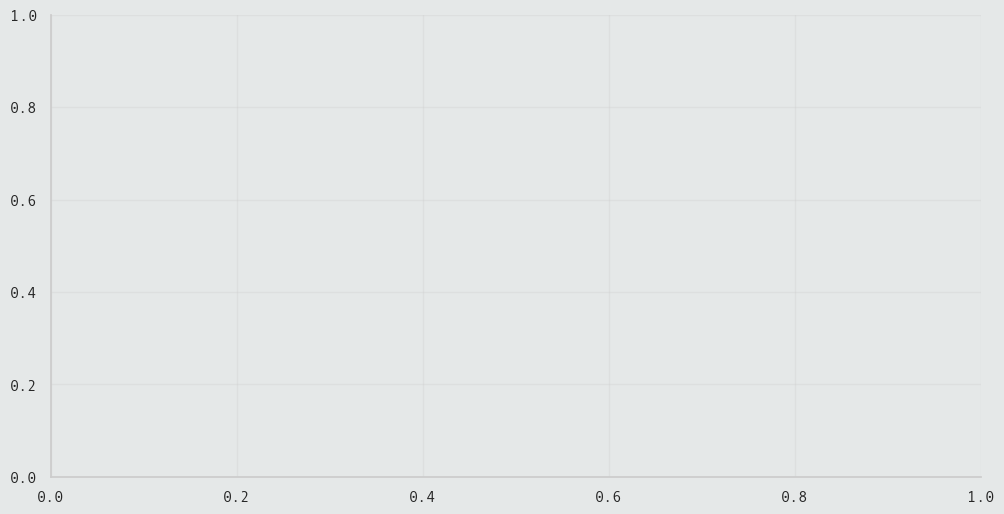

In [24]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot the Lineplot
sns.lineplot(data=books_sold_train.groupby([books_sold_train.date.dt.strftime('%Y-%m'), books_sold_train.country])['num_sold'].sum().reset_index(),
             x='date',
             y='num_sold',
             hue='country')
    
# Set subplot tick rotation
ax.tick_params(labelrotation=45)

# Set x axis ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=books_sold_train.date.dt.strftime('%Y-%m').nunique()/2))
    
# Retrieve legend information
handles = ax.get_legend_handles_labels()[0]
labels = ax.get_legend_handles_labels()[1]
ax.legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.10), 
              fontsize=8,
              ncol=len(handles))

# Set figure Title
figure.suptitle('Lineplot per Category over Time',
                fontweight='bold',
                fontsize=16)

plt.tight_layout()

# Categorical Variables